## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras as k
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from os import path
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## Library Versions

In [2]:
print("Numpy version ",np.version.version)
print("Pandas version",pd.__version__)
print("Sklearn version",sk.__version__)
print("Keras version", k.__version__)
print("Tensorflow version ",tf.__version__)
if tf.test.gpu_device_name():
    print('GPU: {}'.format(tf.test.gpu_device_name()))
else:
    print('CPU')

Numpy version  1.21.6
Pandas version 1.3.5
Sklearn version 1.0.2
Keras version 2.3.1
Tensorflow version  1.15.5
CPU



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

In [3]:
# setting the seed
np.random.seed(7)
tf.set_random_seed(7)

## Loading the data

In [4]:
df = pd.read_csv("DATA/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [5]:
# shape of the dataset
df.shape

(150, 6)

In [6]:
# Column or feild names in the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Summary of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# classes in the dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Visualization

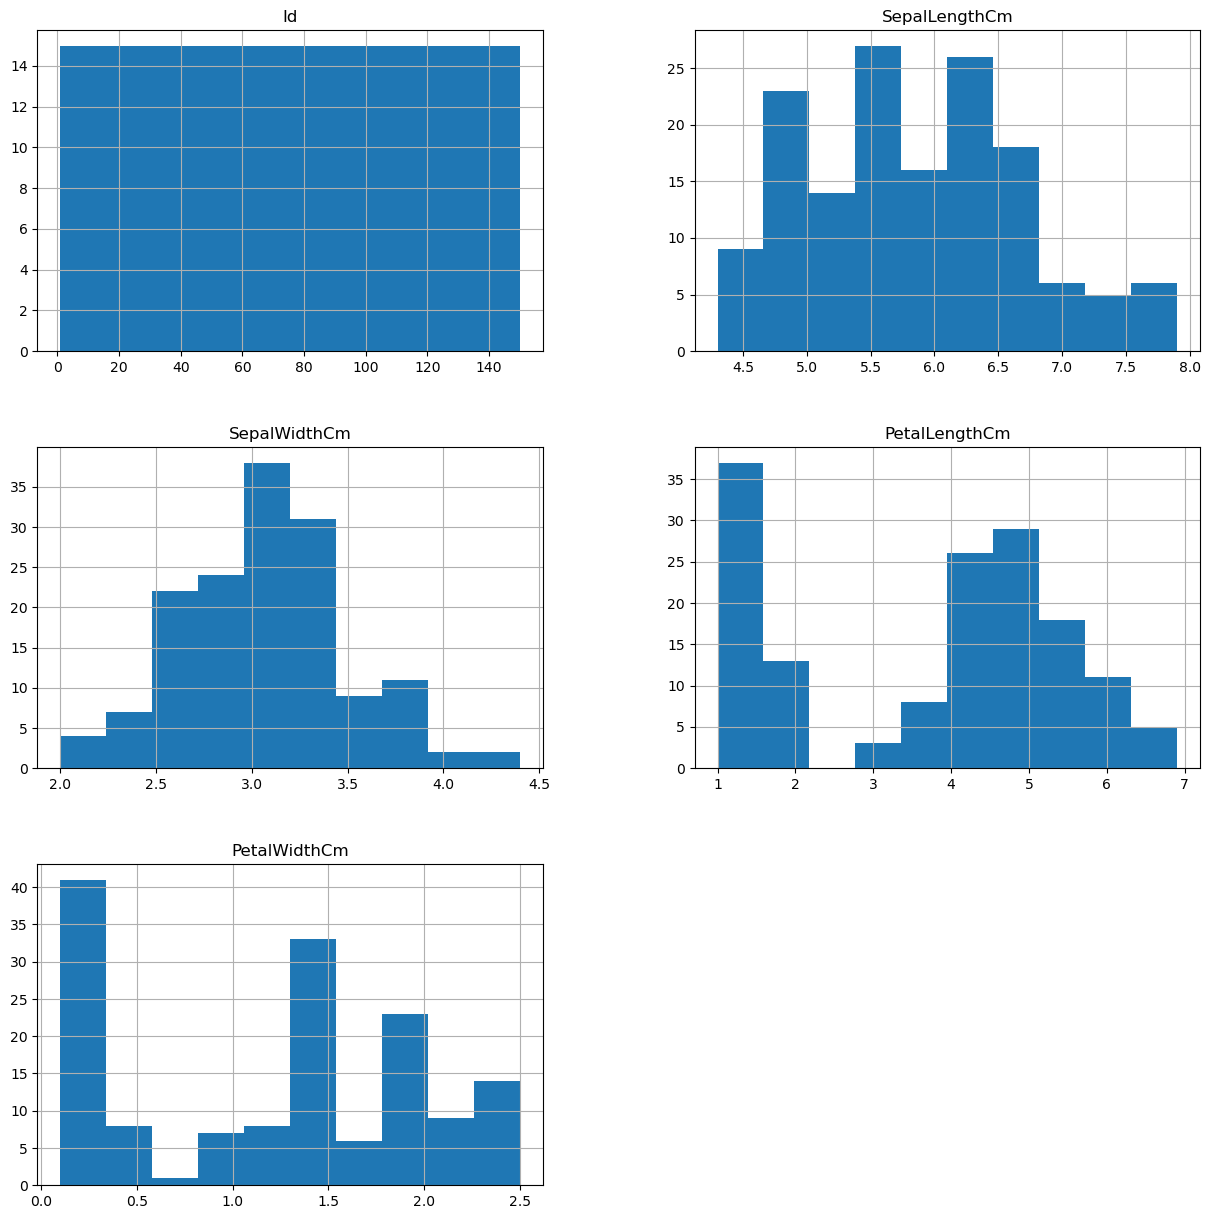

In [12]:
# using histogram
df.hist(figsize=(15,15))
plt.show()

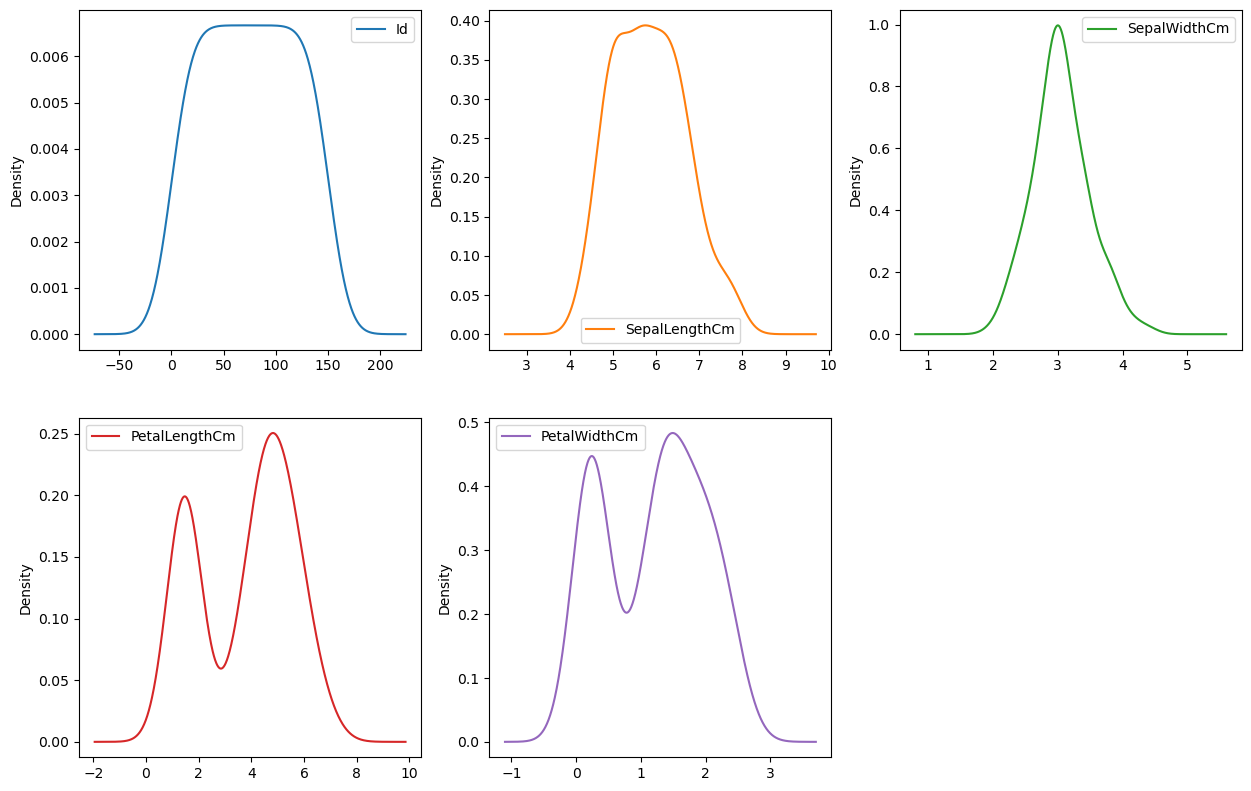

In [13]:
#using density plot
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=True,figsize=(15,15))
plt.show()

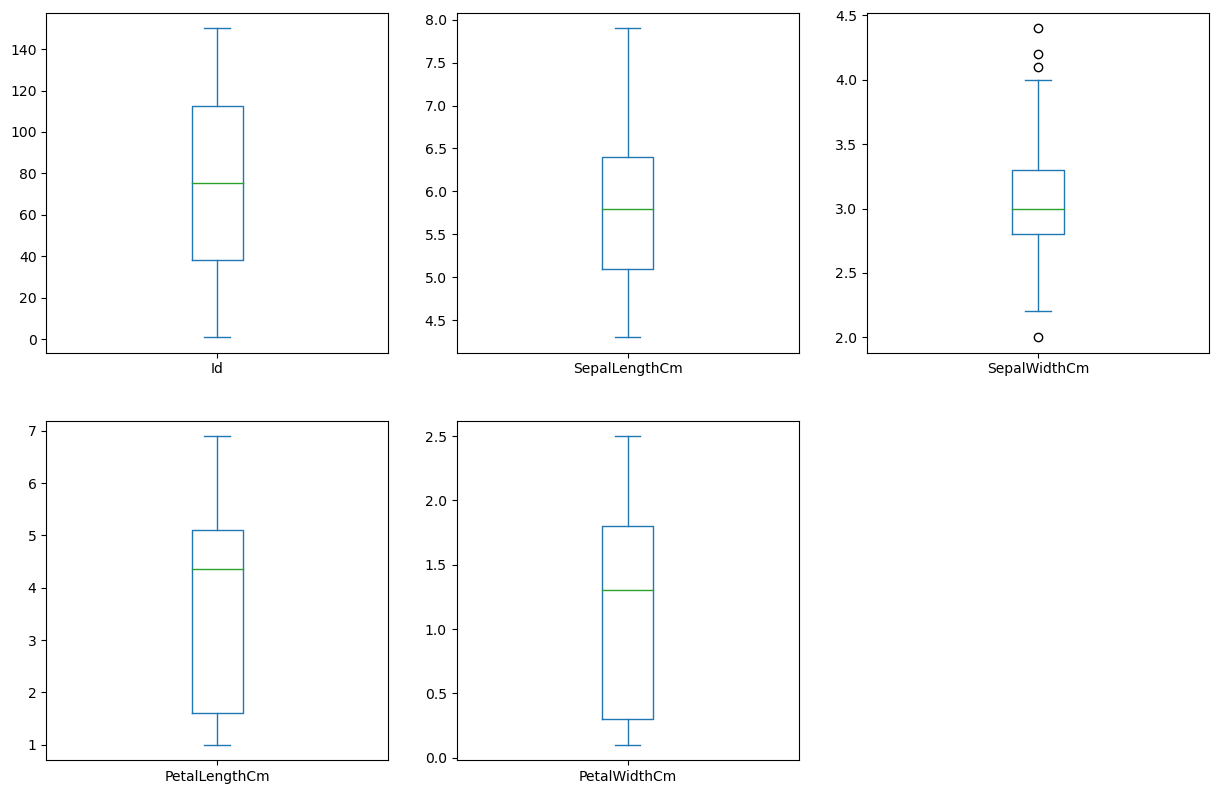

In [14]:
#using box plot
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,legend=True,figsize=(15,15))
plt.show()

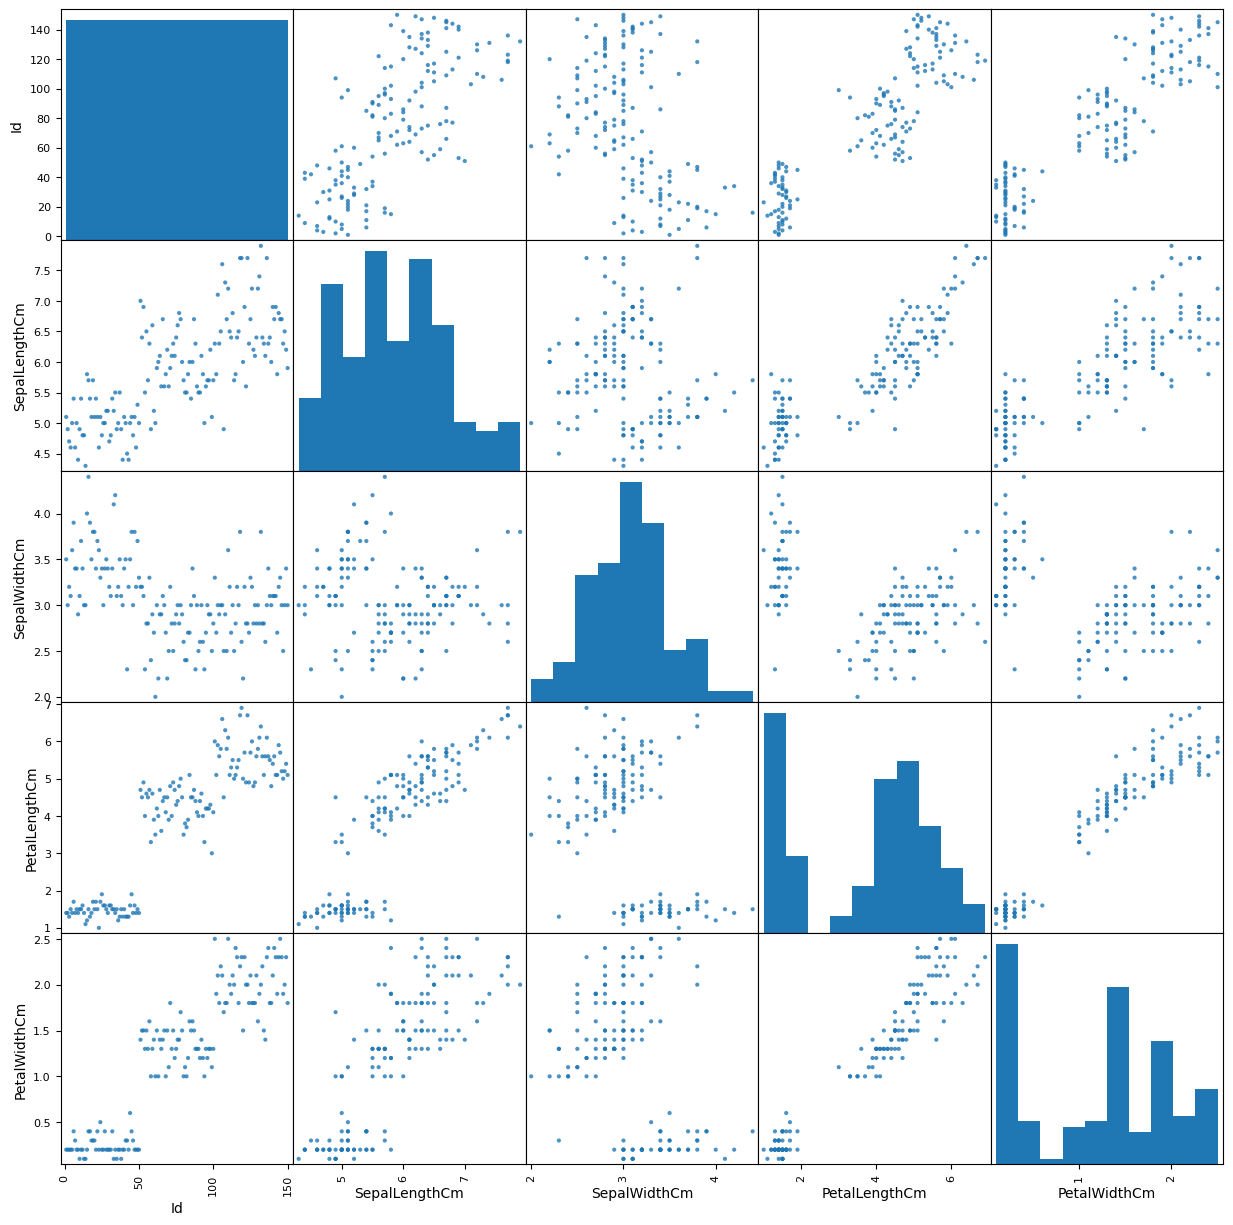

In [15]:
# Using Scatter matrix
scatter_matrix(df,alpha=0.8,figsize=(15,15))
plt.show()

## Splitting the data into input and output arrays

In [16]:
data=df.values
#Input numpy array
X=data[:,1:5]
#Output numpy array
Y=data[:,5]

## Splitting the data into train, val, test datasets

In [17]:
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y,test_size=0.33, random_state=7)
X_val, X_test, Y_val, Y_test = train_test_split(X_test_val, Y_test_val,test_size=0.33, random_state=7)

## One-hot encoding

In [18]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_train = pd.DataFrame(Y_train, columns=lb.classes_)
Y_val = lb.transform(Y_val)
Y_val = pd.DataFrame(Y_val, columns=lb.classes_)
Y_test = lb.transform(Y_test)
Y_test = pd.DataFrame(Y_test, columns=lb.classes_)

## Sequential model of Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
def model_1():
    model = Sequential()
    model.add(Dense(8, input_dim=4,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

## Functional model of Keras

In [20]:
from keras.models import Model
from keras.layers import Input, Dense
def model_2():
    input_layer = Input(shape=(4,))
    hidden_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer_2 = Dense(8, activation='relu')(hidden_layer)
    output_layer = Dense(3, activation='softmax')(hidden_layer_2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    return model

## Training the model

In [21]:
model= model_2()
history = model.fit(X_train,Y_train, epochs=150,batch_size=10,validation_data=(X_val, Y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2024-02-08 22:47:01.555878: I tensorflow/core/common_runtime/process_util.cc:136] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



Train on 100 samples, validate on 33 samples
Epoch 1/150
100/100 [==============================] - 1s 6ms/step - loss: 1.6090 - accuracy: 0.3200 - val_loss: 1.3610 - val_accuracy: 0.3939
Epoch 2/150
100/100 [==============================] - 0s 255us/step - loss: 1.4286 - accuracy: 0.3200 - val_loss: 1.2102 - val_accuracy: 0.3939
Epoch 3/150
 10/100 [==>...........................] - ETA: 0s - loss: 1.8747 - accuracy: 0.0000e+00

OMP: Info #212: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #210: KMP_AFFINITY: Affinity capable, using global cpuid leaf 11 info
OMP: Info #154: KMP_AFFINITY: Initial OS proc set respected: 0-7
OMP: Info #156: KMP_AFFINITY: 8 available OS procs
OMP: Info #157: KMP_AFFINITY: Uniform topology
OMP: Info #179: KMP_AFFINITY: 1 packages x 4 cores/pkg x 2 threads/core (4 total cores)
OMP: Info #214: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #171: KMP_AFFINITY: OS proc 0 maps to package 0 core 0 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 4 maps to package 0 core 0 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 1 maps to package 0 core 1 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 5 maps to package 0 core 1 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 2 maps to package 0 core 2 thread 0 
OMP: Info #171: KMP_AFFINITY: OS proc 6 maps to package 0 core 2 thread 1 
OMP: Info #171: KMP_AFFINITY: OS proc 3 maps to package 0 core 3 thread 0 
OMP: Info #171: KMP_AFFINITY: O

100/100 [==============================] - 0s 288us/step - loss: 1.2729 - accuracy: 0.3500 - val_loss: 1.0978 - val_accuracy: 0.4848
Epoch 4/150
100/100 [==============================] - 0s 263us/step - loss: 1.1338 - accuracy: 0.3800 - val_loss: 1.0064 - val_accuracy: 0.4545
Epoch 5/150
100/100 [==============================] - 0s 251us/step - loss: 1.0426 - accuracy: 0.3700 - val_loss: 0.9320 - val_accuracy: 0.4848
Epoch 6/150
100/100 [==============================] - 0s 251us/step - loss: 0.9534 - accuracy: 0.3600 - val_loss: 0.8814 - val_accuracy: 0.4545
Epoch 7/150
100/100 [==============================] - 0s 251us/step - loss: 0.8967 - accuracy: 0.3600 - val_loss: 0.8469 - val_accuracy: 0.5152
Epoch 8/150
100/100 [==============================] - 0s 239us/step - loss: 0.8528 - accuracy: 0.5500 - val_loss: 0.8053 - val_accuracy: 0.6970
Epoch 9/150
100/100 [==============================] - 0s 243us/step - loss: 0.8126 - accuracy: 0.6800 - val_loss: 0.7721 - val_accuracy: 0.69

## Training loss and accuracy

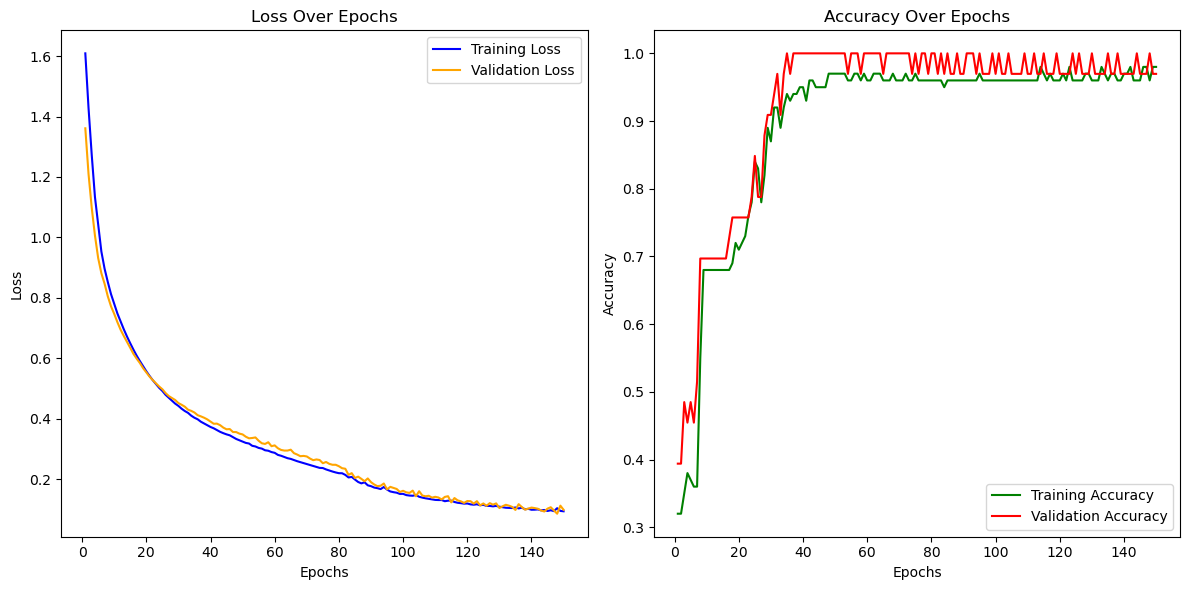

In [22]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs_range = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_loss, label='Training Loss', color='blue')
plt.plot(epochs_range, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy',color='green')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy',color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


## Accuracy of the model

In [23]:
score = model.evaluate(X_test, Y_test)
# print(model.metrics_names[1], score[1]*100)
print(model.metrics_names[1]," : ",score[1])

17/17 [==============================] - 0s 283us/step
accuracy  :  0.9411764740943909
